In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
salaries = pd.concat([pd.read_csv(f"salaries/p_{yr}.csv") for yr in range(2018,2010,-1)])
salaries = salaries.groupby("name").first()
salaries.head()

,title,salary,benefits
name,,,
A. Tupling,Professor,180567.92,519.72
A.Russell Tupling,Professor,166933.16,578.96
Abigail Scholer,Associate Professor,132597.73,373.00
Achim Kempf,Professor,187834.44,395.88
Ada Barlatt,Assistant Professor,102159.48,359.08


In [3]:
evals = pd.read_csv("averages.csv")
evals[["term"]]=pd.Categorical(evals.term)
evals[["section"]]=pd.Categorical(evals.section)
evals["response_rate"] = evals.num_responses / evals.enrolled
evals.head()

,term,ccode,section,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate
0,1131,['ACTSC 231'],1,Anne Mackay,1.600000,2.873239,1.536232,1.591549,1.676056,1.526316,1.776119,1.647887,1.225352,1.588235,1.358209,2.036364,2.782609,2.901639,2.279412,71,184,0.385870
1,1131,['ACTSC 231'],51,Carole Bernard,1.727273,2.909091,2.090909,1.700000,2.000000,1.444444,1.700000,1.818182,1.000000,1.300000,1.625000,1.333333,2.545455,2.818182,2.000000,11,18,0.611111
2,1131,['ACTSC 232'],1,James Adcock,1.360825,2.804124,1.453608,1.567010,1.268041,2.000000,1.641304,1.391753,1.154639,1.604167,1.516129,1.865169,2.659794,2.927835,2.000000,97,143,0.678322
3,1131,['ACTSC 331'],1,Rocky Cui,1.851064,2.744681,2.043478,1.978723,2.108696,1.515152,1.866667,1.936170,1.297872,1.500000,1.586207,1.878049,2.659574,2.755556,2.021277,47,95,0.494737
4,1131,['ACTSC 371'],1,Brent Matheson,2.221053,2.821053,2.000000,2.452632,2.242105,2.565217,2.070588,2.333333,1.329787,1.741935,1.909091,2.271429,2.851064,3.021277,1.903226,95,236,0.402542


In [4]:
df = evals
df = df[evals.num_responses>10] # only surveys with >10 responses
df = df.groupby("instructor").filter(lambda x:len(x)>2) # only teachers with >=3 classes
df = pd.merge(df, salaries, how='left', left_on=["instructor"], right_on=['name'])
df = df.drop(['benefits',"section"], axis=1)
df.head()

,term,ccode,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary
0,1131,['ACTSC 232'],James Adcock,1.360825,2.804124,1.453608,1.567010,1.268041,2.000000,1.641304,1.391753,1.154639,1.604167,1.516129,1.865169,2.659794,2.927835,2.000000,97,143,0.678322,Lecturer,136295.28
1,1131,['ACTSC 371'],Brent Matheson,2.221053,2.821053,2.000000,2.452632,2.242105,2.565217,2.070588,2.333333,1.329787,1.741935,1.909091,2.271429,2.851064,3.021277,1.903226,95,236,0.402542,Lecturer,128478.60
2,1131,['ACTSC 372'],Peter Wood,1.435644,2.623762,1.400000,1.574257,1.386139,1.712121,1.590000,1.455446,1.227723,1.666667,1.785714,2.103896,2.762376,2.891089,1.930000,101,174,0.580460,Lecturer,162561.88
3,1131,"['ACTSC 433', 'ACTSC 833']",Jun Cai,1.723077,2.859375,2.262295,1.923077,2.476923,2.352941,1.833333,1.984375,1.138462,1.415385,1.578947,2.166667,2.907692,2.707692,1.968750,65,107,0.607477,Professor,161277.18
4,1131,"['ACTSC 446', 'ACTSC 846']",Ruodo Wang,2.308411,2.557692,1.990566,2.644860,2.679245,2.000000,2.031250,2.262136,1.457944,1.775701,1.819444,2.370968,2.538462,2.844660,2.038095,107,178,0.601124,Associate Professor,141182.60


# Average Course Metrics

In [5]:
# Remove courses with less than 10 recorded offerings
courses = df
courses = courses.groupby("ccode").filter(lambda x: len(x) >= 5)
courses = courses.groupby("ccode").mean()
courses.head()

,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,salary
ccode,,,,,,,,,,,,,,,,,,,
['ACTSC 221'],1.783567,2.971104,1.763304,2.065661,1.857502,1.829612,1.773712,1.773262,1.504529,1.547468,1.634819,1.665751,2.938886,2.913864,1.969716,28.166667,84.250000,0.339564,125098.626667
['ACTSC 231'],1.884200,2.842654,1.907730,1.999128,1.965824,2.044250,1.896880,1.990628,1.589730,1.737295,1.651877,1.752846,2.680103,2.948863,2.175934,68.650000,168.850000,0.411397,130314.781818
['ACTSC 232'],1.433347,2.815046,1.649639,1.569341,1.414704,2.069302,1.622572,1.496144,1.223817,1.562608,1.619603,1.907960,2.678719,2.838079,2.271997,49.937500,107.125000,0.456646,133983.236250
['ACTSC 331'],1.725756,2.815170,1.973191,1.939091,2.090707,2.073972,1.835941,1.852819,1.245801,1.559469,1.551193,1.985983,2.744373,2.948365,2.144544,45.142857,78.285714,0.578400,163741.270909
['ACTSC 371'],2.185535,2.838205,1.973223,2.354624,2.140812,2.067162,1.881763,2.159556,1.711760,1.812607,1.738235,1.960419,2.756681,3.067520,2.042104,69.000000,159.130435,0.428214,124283.510476


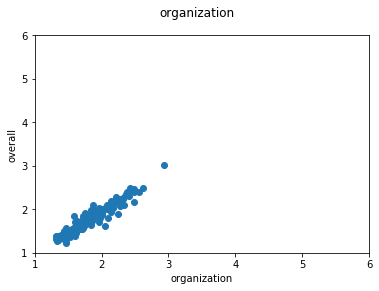

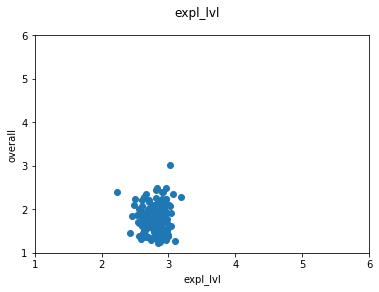

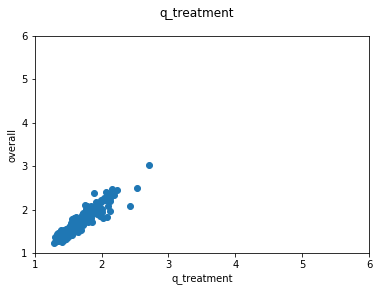

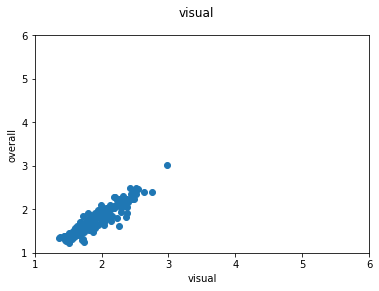

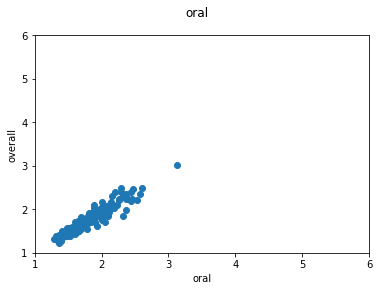

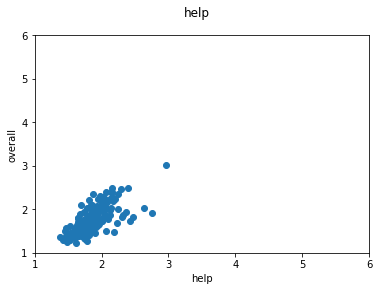

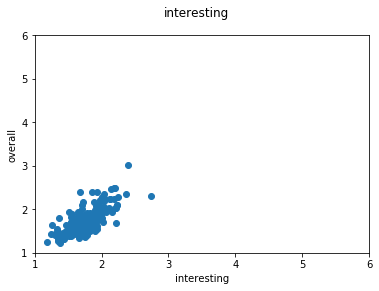

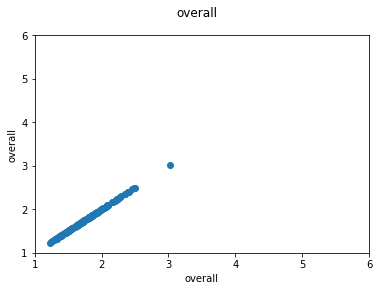

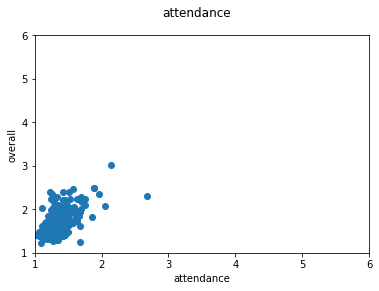

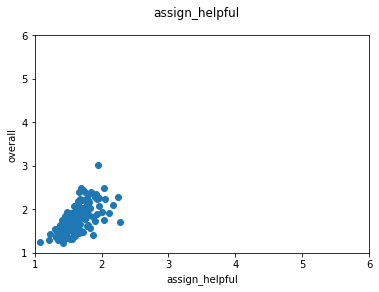

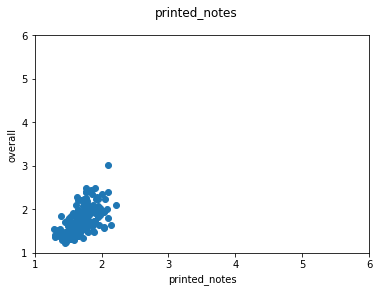

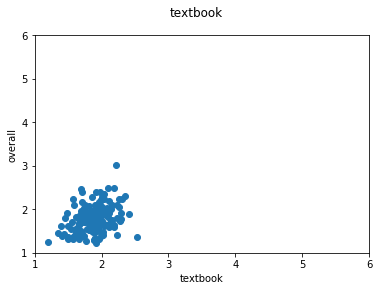

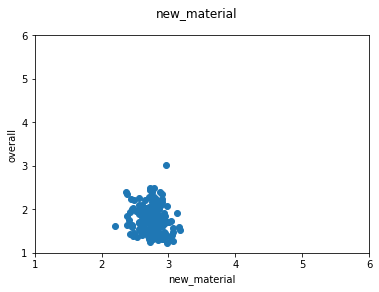

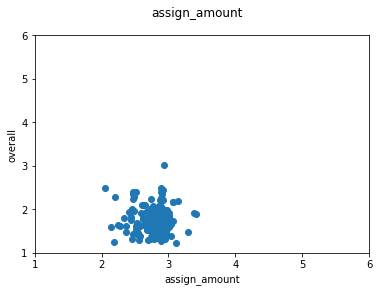

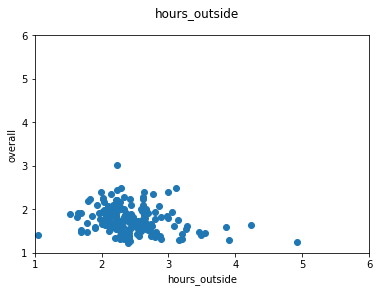

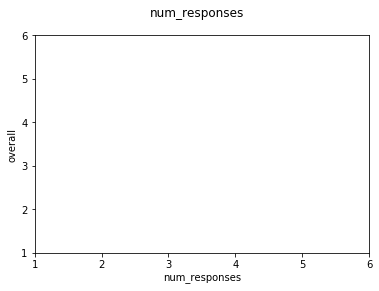

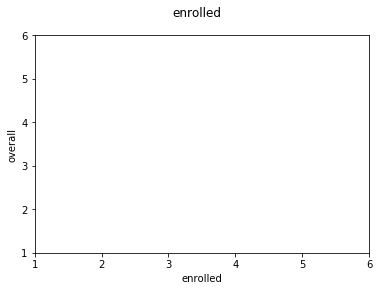

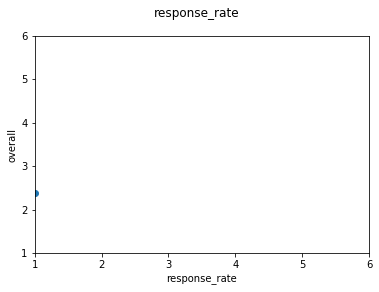

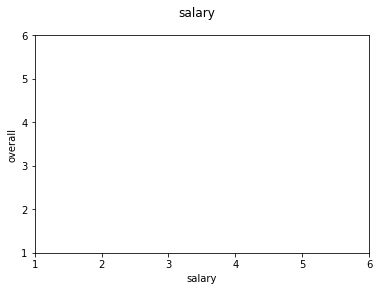

In [6]:
for col in courses.columns:
    fig, ax = plt.subplots()
    ax.scatter(courses[col], courses['overall'])
    fig.suptitle(col)
    plt.xlabel(col)
    plt.ylabel("overall")
    # Note: bad for non-survey graphs
    plt.xlim(1, 6)
    plt.ylim(1, 6)

# Average Intsructor Metrics

In [7]:
# TODO: Weighted mean?
# Remove instructors with less than three evals
instructors = df
instructors = instructors.groupby("instructor").filter(lambda x: len(x) >= 3)
instructors = instructors.groupby("instructor").mean()

# We lose title due to mean I think?
# Merge back most recent salary, title
instructors = instructors.drop("salary", axis=1)
instructors = instructors.join(salaries, how='left')
instructors = instructors.drop(["benefits"], axis=1)

instructors.head()

,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary
instructor,,,,,,,,,,,,,,,,,,,,
Adam Kolkiewicz,1.691446,2.429451,1.510890,1.950600,1.885041,1.362193,1.635859,1.561237,1.243845,1.470170,1.471251,1.550505,2.583002,2.639731,2.495896,29.00,72.333333,0.446812,Associate Professor,175958.2
Adam Roegiest,1.862390,2.794451,1.832141,2.112739,1.795893,2.033704,1.717994,1.856250,1.278992,1.531858,2.032509,2.391384,2.577641,2.122081,3.652393,51.75,90.500000,0.583992,NaN,NaN
Adriel Dean-Hall,2.314286,3.033968,2.013506,2.449048,2.227879,2.418803,1.849768,2.234791,1.599206,1.598413,1.792929,2.055556,2.777233,2.349206,3.241270,25.00,69.333333,0.359124,NaN,NaN
Ahmad Alrefai,3.056345,3.086275,2.738697,3.266667,3.419231,1.827778,1.891059,3.225774,1.857143,1.709017,2.039683,2.236467,2.333333,2.300389,3.327778,32.00,53.000000,0.558923,NaN,NaN
Ahmed Ayaz Ataullah,2.038713,2.891438,1.781366,2.207169,2.030823,2.069040,2.168041,1.939435,1.687095,1.855265,1.856527,2.356944,2.887103,2.975629,1.891201,51.00,98.166667,0.525865,NaN,NaN


In [9]:
instructors.columns

Index(['organization', 'expl_lvl', 'q_treatment', 'visual', 'oral', 'help',
       'interesting', 'overall', 'attendance', 'assign_helpful',
       'printed_notes', 'textbook', 'new_material', 'assign_amount',
       'hours_outside', 'num_responses', 'enrolled', 'response_rate', 'title',
       'salary'],
      dtype='object')

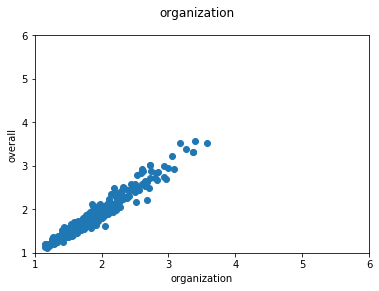

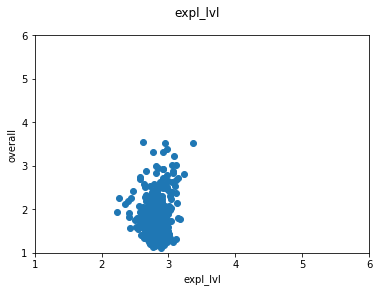

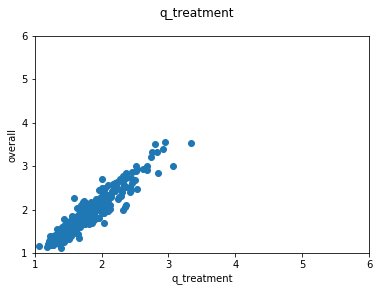

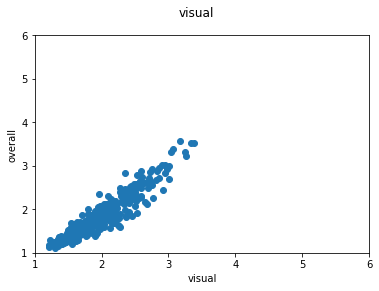

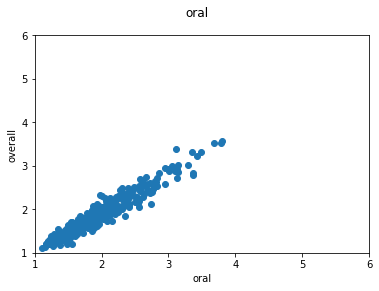

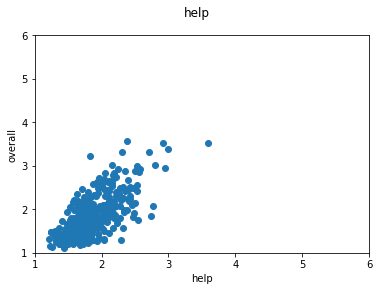

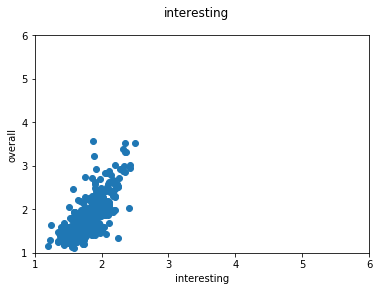

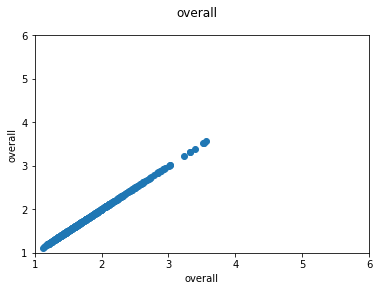

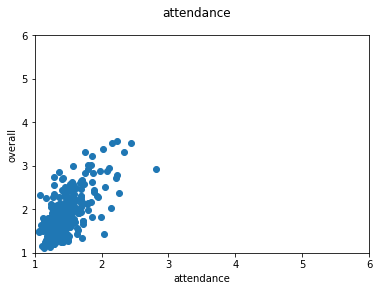

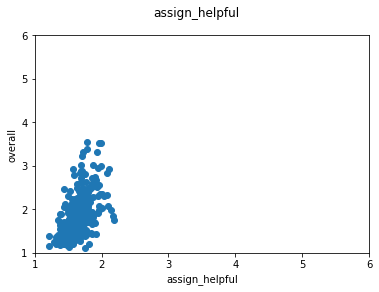

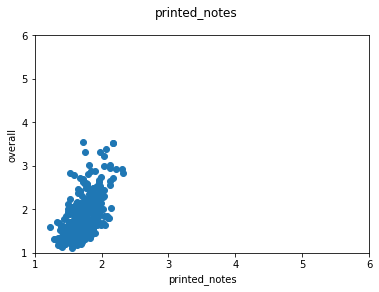

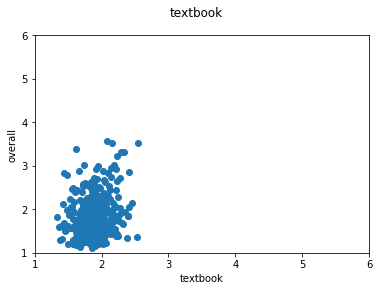

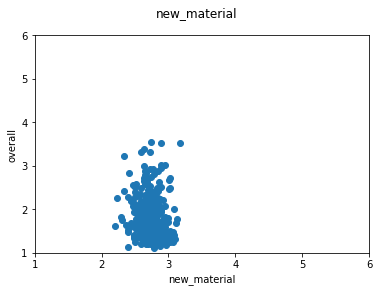

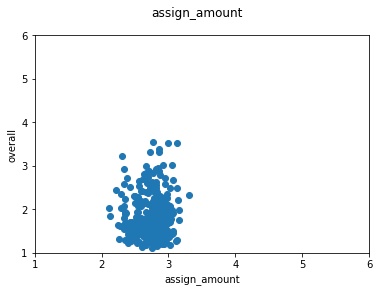

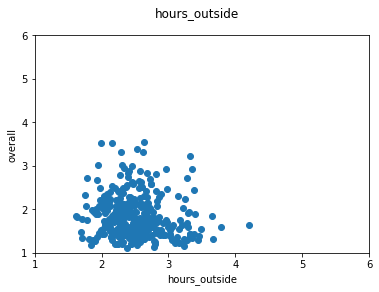

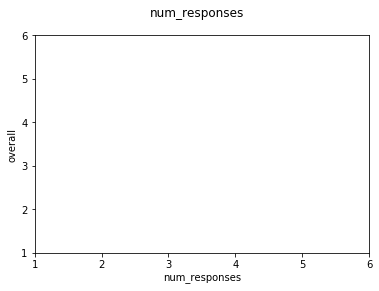

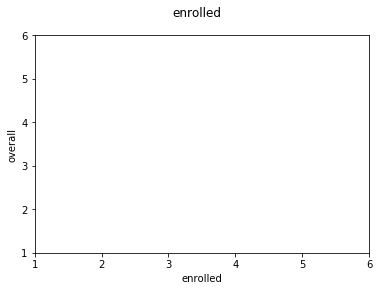

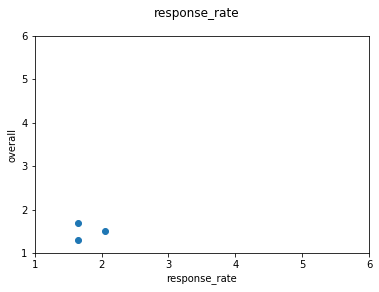

In [11]:
for col in instructors.columns[:-2]:
    fig, ax = plt.subplots()
    ax.scatter(instructors[col], instructors['overall'])
    fig.suptitle(col)
    plt.xlabel(col)
    plt.ylabel("overall")
    # Note: bad for non-survey graphs
    plt.xlim(1, 6)
    plt.ylim(1, 6)

# How correlated are oral and overall?

In [12]:
corr = df
corr = corr.groupby("ccode").filter(lambda x: len(x) >= 5)
print(len(courses), " courses considered")
corr = corr.groupby("ccode").corr()
corr.head(25)

163  courses considered


organization  expl_lvl  q_treatment    visual  \
ccode                                                                         
['ACTSC 221'] organization        1.000000  0.195325     0.802095  0.973325   
              expl_lvl            0.195325  1.000000    -0.240277  0.230161   
              q_treatment         0.802095 -0.240277     1.000000  0.742036   
              visual              0.973325  0.230161     0.742036  1.000000   
              oral                0.910124  0.020218     0.846914  0.901096   
              help                0.600388 -0.471500     0.843536  0.483454   
              interesting         0.734226 -0.111138     0.880835  0.722376   
              overall             0.950472 -0.011162     0.927879  0.908096   
              attendance          0.055265  0.732112    -0.399817  0.003001   
              assign_helpful      0.815350 -0.238757     0.845160  0.796948   
              printed_notes       0.713085  0.247212     0.328581  0.698162   
              textbook            0.185964 -0.643215     0.560233  0.097866   
              new_material       -0.480554  0.590681    -0.510741 -0.504793   
              assign_amount      -0.404861  0.468994    -0.521924 -0.412254   
              hours_outside       0.527059 -0.059315     0.485326  0.615777   
              num_responses      -0.085078 -0.252027    -0.161251 -0.216240   
              enrolled           -0.035630 -0.208147    -0.260005  0.040664   
              response_rate      -0.096268 -0.248641    -0.037888 -0.254413   
              salary              0.729340  0.331100     0.655669  0.754331   
['ACTSC 231'] organization        1.000000  0.293883     0.857336  0.749211   
              expl_lvl            0.293883  1.000000     0.287562  0.169686   
              q_treatment         0.857336  0.287562     1.000000  0.693889   
              visual              0.749211  0.169686     0.693889  1.000000   
              oral                0.746988  0.356879     0.879122  0.476518   
              help                0.654628  0.406464     0.822029  0.691636   

                                  oral      help  interesting   overall  \
ccode                                                                     
['ACTSC 221'] organization    0.910124  0.600388     0.734226  0.950472   
              expl_lvl        0.020218 -0.471500    -0.111138 -0.011162   
              q_treatment     0.846914  0.843536     0.880835  0.927879   
              visual          0.901096  0.483454     0.722376  0.908096   
              oral            1.000000  0.631275     0.836186  0.922244   
              help            0.631275  1.000000     0.604024  0.761134   
              interesting     0.836186  0.604024     1.000000  0.821305   
              overall         0.922244  0.761134     0.821305  1.000000   
              attendance     -0.221819 -0.322463    -0.464991 -0.147259   
              assign_helpful  0.868270  0.692123     0.888961  0.847914   
              printed_notes   0.590590  0.263659     0.313061  0.585687   
              textbook        0.342646  0.731962     0.414501  0.373741   
              new_material   -0.556222 -0.545864    -0.363706 -0.514743   
              assign_amount  -0.653724 -0.553152    -0.379776 -0.498110   
              hours_outside   0.683837  0.235355     0.386966  0.529028   
              num_responses  -0.229497  0.048587    -0.255997 -0.116104   
              enrolled        0.036720 -0.235004    -0.286938 -0.171635   
              response_rate  -0.244810  0.175291    -0.128478 -0.053202   
              salary          0.598403  0.340769     0.727720  0.705029   
['ACTSC 231'] organization    0.746988  0.654628     0.468158  0.922190   
              expl_lvl        0.356879  0.406464    -0.112535  0.295228   
              q_treatment     0.879122  0.822029     0.471819  0.928262   
              visual          0.476518  0.691636     0.391526  0.744208   
              oral   

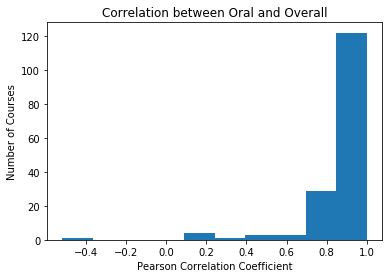

In [13]:
oral_overall_corr = corr.loc[(slice(None), 'oral'), ["overall"]]

plt.hist(oral_overall_corr["overall"])
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Number of Courses")
plt.title("Correlation between Oral and Overall")
plt.show()

In [14]:
oral_overall_corr.sort_values("overall").head(10)

,,overall
ccode,,
['PMATH 348'],oral,-0.515373
['SE 212'],oral,0.130992
['AMATH 271'],oral,0.184033
['MATH 145'],oral,0.215719
"['CS 444', 'CS 644']",oral,0.219694
['PMATH 351'],oral,0.356860
"['STAT 331', 'SYDE 334']",oral,0.481262
['STAT 334'],oral,0.492169
['PMATH 340'],oral,0.521441


Look at some low correlation:

In [15]:
# Only course with negative correlation
df[df.ccode == "['PMATH 348']"]

,term,ccode,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary
625,1141,['PMATH 348'],Ross Willard,1.206897,3.214286,1.241379,1.428571,1.172414,1.562500,1.310345,1.206897,1.137931,1.464286,1.444444,1.933333,3.137931,3.035714,2.275862,29,37,0.783784,Professor,198048.44
1150,1151,['PMATH 348'],Frank Zorzitto,1.625000,3.187500,1.250000,1.625000,1.187500,1.875000,1.250000,1.375000,1.437500,1.437500,1.416667,2.000000,3.250000,2.875000,2.312500,16,20,0.800000,Professor,128873.88
1730,1161,['PMATH 348'],Yu-Ru Liu,1.291667,3.000000,1.416667,1.333333,1.708333,2.461538,1.391304,1.208333,1.166667,1.458333,1.333333,1.500000,3.086957,2.833333,2.391304,24,36,0.666667,Professor,152703.16
2346,1171,['PMATH 348'],Blake Madill,1.472222,3.228571,1.305556,1.472222,1.361111,1.653846,1.514286,1.333333,1.378378,1.432432,1.833333,1.928571,2.972222,2.777778,2.513514,37,52,0.711538,NaN,NaN
2937,1181,['PMATH 348'],Yu-Ru Liu,1.114286,2.857143,1.342857,1.457143,1.542857,1.391304,1.314286,1.200000,1.257143,1.342857,1.250000,1.500000,2.885714,2.882353,2.647059,35,50,0.700000,Professor,152703.16


In [16]:
# Same instructor?
df[df.ccode == "['SE 212']"]

,term,ccode,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary
481,1139,['SE 212'],Nancy Day,1.593750,2.365079,1.468750,1.718750,1.451613,1.562500,1.983871,1.640625,1.343750,1.515625,1.714286,2.578947,2.174603,2.593750,2.213115,64,130,0.492308,NaN,NaN
771,1149,['SE 212'],Nancy Day,1.200000,2.675000,1.400000,1.700000,1.350000,1.586207,1.775000,1.275000,1.325000,1.307692,1.500000,2.263158,2.450000,2.850000,2.150000,40,71,0.563380,NaN,NaN
1304,1159,['SE 212'],Nancy Day,1.444444,2.666667,1.185185,1.592593,1.407407,1.800000,1.703704,1.230769,1.333333,1.296296,1.560000,2.625000,2.555556,2.814815,2.333333,27,55,0.490909,NaN,NaN
1305,1159,['SE 212'],Nancy Day,1.440000,2.680000,1.600000,1.800000,1.400000,1.916667,1.720000,1.360000,1.400000,1.400000,1.631579,2.461538,2.520000,2.720000,2.440000,25,70,0.357143,NaN,NaN
1898,1169,['SE 212'],Nancy Day,1.285714,2.853659,1.261905,1.500000,1.404762,1.925926,1.595238,1.285714,1.238095,1.404762,1.629630,2.666667,2.690476,2.785714,2.261905,42,62,0.677419,NaN,NaN
1899,1169,['SE 212'],Nancy Day,1.394737,2.736842,1.368421,1.461538,1.289474,1.500000,1.842105,1.461538,1.358974,1.447368,1.642857,2.500000,2.564103,2.897436,2.102564,39,59,0.661017,NaN,NaN
2773,1179,['SE 212'],Nancy Day,1.272727,2.722222,1.272727,1.472727,1.345455,1.387097,1.636364,1.272727,1.436364,1.127273,1.500000,2.558824,2.759259,2.854545,2.345455,55,85,0.647059,NaN,NaN
2774,1179,['SE 212'],Nancy Day,1.476190,2.619048,1.190476,1.428571,1.238095,1.100000,1.761905,1.380952,1.047619,1.100000,1.333333,2.533333,2.571429,2.857143,2.238095,21,48,0.437500,NaN,NaN


In [17]:
# Same instructor?
df[df.ccode == "['AMATH 271']"]

,term,ccode,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary
293,1139,['AMATH 271'],Michael Waite,1.263158,2.842105,1.105263,1.526316,1.210526,1.500,1.631579,1.263158,1.052632,1.578947,1.500000,1.526316,3.111111,2.789474,2.157895,19,25,0.760000,Associate Professor,137951.12
775,1149,['AMATH 271'],Michael Waite,1.125000,2.733333,1.500000,1.266667,1.312500,1.625,1.466667,1.250000,1.062500,1.750000,1.000000,1.437500,2.937500,2.937500,2.125000,16,19,0.842105,Associate Professor,137951.12
1334,1159,['AMATH 271'],Michael Waite,1.363636,2.809524,1.681818,1.454545,1.272727,1.600,1.454545,1.409091,1.227273,1.772727,1.800000,1.636364,2.863636,2.590909,2.272727,22,33,0.666667,Associate Professor,137951.12
1922,1169,['AMATH 271'],Francis Poulin,1.523810,2.952381,1.428571,1.666667,1.523810,1.250,1.285714,1.333333,1.380952,1.333333,1.000000,1.300000,2.904762,2.842105,2.666667,21,31,0.677419,Professor,164428.12
2528,1179,['AMATH 271'],Michael Waite,1.333333,2.933333,1.466667,1.533333,1.333333,1.200,1.333333,1.333333,1.400000,1.200000,2.333333,1.600000,2.800000,2.466667,2.466667,15,21,0.714286,Associate Professor,137951.12


In [18]:
# DJao bad at oral but still liked
# Have taken with Snew
df[df.ccode == "['MATH 145']"]

,term,ccode,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary
421,1139,['MATH 145'],David Jao,1.913043,2.391304,1.478261,1.804348,1.466667,1.615385,1.234043,1.531915,1.085106,1.276596,1.617647,2.000000,2.422222,2.304348,4.085106,47,65,0.723077,Professor,141649.48
931,1149,['MATH 145'],David Jao,2.000000,2.313725,1.490196,1.784314,1.480000,1.750000,1.200000,1.490196,1.392157,1.352941,1.756757,1.578947,2.183673,2.100000,4.180000,51,56,0.910714,Professor,141649.48
1508,1159,['MATH 145'],Stephen New,1.386364,2.837209,1.454545,1.818182,1.454545,1.424242,1.454545,1.431818,1.386364,1.302326,1.454545,1.894737,2.863636,2.795455,3.093023,44,82,0.536585,Lecturer,134661.60
2085,1169,['MATH 145'],Stephen New,1.355932,2.305085,1.220339,1.440678,1.271186,1.627451,1.241379,1.237288,1.135593,1.288136,1.255319,1.500000,2.508475,2.627119,3.152542,59,96,0.614583,Lecturer,134661.60
2105,1169,['MATH 145'],Stephen New,1.526316,2.222222,1.526316,1.555556,1.315789,1.555556,1.368421,1.578947,1.294118,1.666667,1.294118,1.666667,2.526316,2.578947,3.263158,19,33,0.575758,Lecturer,134661.60
2626,1179,['MATH 145'],Stephen New,1.509804,2.326923,1.250000,1.519231,1.423077,1.255319,1.403846,1.461538,1.260000,1.307692,1.282609,1.692308,2.461538,2.692308,3.470588,52,76,0.684211,Lecturer,134661.60
2627,1179,['MATH 145'],Stephen New,1.666667,2.610169,1.385965,1.800000,1.593220,1.200000,1.366667,1.400000,1.457627,1.288136,1.150943,1.600000,2.474576,2.666667,3.534483,60,85,0.705882,Lecturer,134661.60


In [19]:
# Lhotak bad at oral but still liked, also not a lot of focus on lectures
# Have taken a course with Lhotak
df[df.ccode == "['CS 444', 'CS 644']"]

,term,ccode,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary
560,1141,"['CS 444', 'CS 644']",Ondrej Lhotak,1.230769,2.962963,1.444444,2.037037,1.444444,1.500000,1.555556,1.370370,1.481481,1.296296,1.750000,2.111111,2.884615,2.518519,4.296296,27,48,0.562500,Associate Professor,130109.99
1079,1151,"['CS 444', 'CS 644']",Brad Lushman,1.297297,3.000000,1.457143,1.621622,1.270270,1.666667,1.459459,1.378378,1.378378,1.162162,2.000000,2.400000,2.945946,2.750000,3.513514,37,51,0.725490,Lecturer,138060.60
1678,1161,"['CS 444', 'CS 644']",Ondrej Lhotak,1.333333,2.958333,1.130435,1.652174,1.291667,1.000000,1.208333,1.166667,1.083333,1.260870,1.666667,1.333333,3.043478,2.583333,3.958333,24,45,0.533333,Associate Professor,130109.99
2255,1171,"['CS 444', 'CS 644']",Ondrej Lhotak,1.466667,2.966667,1.333333,1.733333,1.466667,1.647059,1.500000,1.266667,1.482759,1.206897,1.500000,1.857143,3.137931,2.586207,3.700000,30,52,0.576923,Associate Professor,130109.99
2854,1181,"['CS 444', 'CS 644']",Nomair Naeem,1.407407,2.888889,1.360000,1.500000,1.259259,1.333333,1.259259,1.259259,1.259259,1.185185,1.000000,1.750000,3.192308,2.346154,4.037037,27,36,0.750000,Lecturer,121400.04


In [20]:
df[df.ccode == "['PMATH 351']"]

,term,ccode,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary
446,1139,['PMATH 351'],Alexandru Nica,1.081081,3.162162,1.486486,1.270270,1.444444,1.875000,1.485714,1.277778,1.135135,1.405405,1.162162,1.400000,3.081081,3.000000,2.405405,37,51,0.725490,Professor,176320.48
750,1145,['PMATH 351'],Laurent Marcoux,1.263158,2.210526,1.263158,1.315789,1.368421,1.533333,1.368421,1.263158,1.315789,1.444444,1.333333,2.000000,2.421053,2.055556,3.210526,19,27,0.703704,Professor,185672.32
1283,1155,['PMATH 351'],Mahmood Alaghmandan,1.555556,2.705882,1.722222,1.666667,1.611111,1.692308,1.833333,1.722222,1.277778,1.588235,1.000000,2.000000,2.764706,2.833333,2.687500,18,26,0.692308,NaN,NaN
1308,1159,['PMATH 351'],Alexandru Nica,1.250000,2.975000,1.525000,1.425000,1.512821,1.904762,1.487179,1.175000,1.225000,1.410256,1.189189,1.250000,3.076923,2.675000,2.550000,40,48,0.833333,Professor,176320.48
1882,1165,['PMATH 351'],Alexandru Nica,1.125000,3.166667,1.478261,1.250000,1.375000,1.866667,1.291667,1.166667,1.416667,1.250000,1.208333,1.181818,3.125000,2.916667,2.583333,24,31,0.774194,Professor,176320.48
2126,1169,['PMATH 351'],Laurent Marcoux,1.526316,3.000000,1.705882,1.526316,1.368421,2.333333,1.600000,1.684211,1.736842,1.650000,1.125000,2.000000,2.500000,2.200000,3.263158,20,36,0.555556,Professor,185672.32
2500,1175,['PMATH 351'],Alexandru Nica,1.068182,3.113636,1.317073,1.340909,1.386364,1.882353,1.318182,1.136364,1.136364,1.272727,1.116279,1.266667,3.045455,2.930233,2.441860,44,51,0.862745,Professor,176320.48
2764,1179,['PMATH 351'],Nico Spronk,1.739130,2.478261,1.428571,1.772727,1.565217,1.368421,1.590909,1.608696,1.260870,1.434783,1.600000,1.250000,2.272727,2.217391,3.363636,23,52,0.442308,Professor,158685.40
3096,1185,['PMATH 351'],Kathryn Hare,1.312500,2.500000,1.551724,1.562500,1.218750,1.600000,1.612903,1.406250,1.406250,1.343750,2.500000,2.000000,2.437500,2.375000,3.343750,32,73,0.438356,Professor,210100.82


# How correlated are organization and overall?

Even more than oral

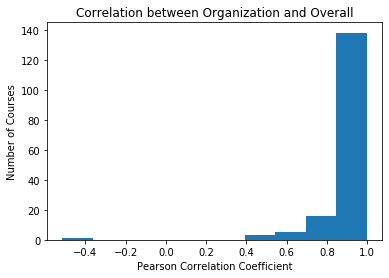

In [21]:
organization_overall_corr = corr.loc[(slice(None), 'organization'), ["overall"]]

plt.hist(organization_overall_corr["overall"])
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Number of Courses")
plt.title("Correlation between Organization and Overall")
plt.show()

In [22]:
organization_overall_corr.sort_values("overall").head(10)

,,overall
ccode,,
"['CS 444', 'CS 644']",organization,-0.513644
['MATH 145'],organization,0.505874
['STAT 334'],organization,0.508027
['CS 200'],organization,0.525412
['CS 697'],organization,0.583868
['COMM 321'],organization,0.615111
['AMATH 271'],organization,0.634871
"['CS 452', 'CS 652']",organization,0.669933
['STAT 316'],organization,0.674166


Note same stuff: CS 444 disorganized (Lhotak) but less emphasis on lectures, Djao disorganized in MATH 145

# How correlated are overall and tenure?

In [32]:
instructors_with_tenure = instructors
instructors_with_tenure = instructors_with_tenure[pd.notnull(instructors_with_tenure.title)]
instructors_with_tenure['tenure'] = instructors_with_tenure.title.isin(["Professor", "Associate Professor"])
instructors_with_tenure

/home/jeffrey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary,tenure
instructor,,,,,,,,,,,,,,,,,,,,,
Adam Kolkiewicz,1.691446,2.429451,1.510890,1.950600,1.885041,1.362193,1.635859,1.561237,1.243845,1.470170,1.471251,1.550505,2.583002,2.639731,2.495896,29.000000,72.333333,0.446812,Associate Professor,175958.20,True
Alain Gamache,1.760296,2.700126,1.624621,1.963630,1.864430,1.536384,1.823023,1.764562,1.464250,1.774100,1.884181,1.612922,2.540881,2.790882,2.559423,46.400000,75.800000,0.584862,Lecturer,109462.60,False
Alexandru Nica,1.253374,3.107308,1.463501,1.442157,1.518790,2.034641,1.557096,1.327230,1.190640,1.429681,1.308755,1.699311,3.103461,2.848492,2.504139,45.000000,57.375000,0.784723,Professor,176320.48,True
Alfred Menezes,1.237729,2.817838,1.252193,1.408197,1.295933,1.386157,1.441914,1.212473,1.206269,1.442886,1.450616,1.688415,2.734443,2.828972,2.437776,54.857143,97.714286,0.627506,Professor,191707.24,True
Ali Ghodsi Boushehri,2.011842,2.654026,1.855252,1.977676,1.969376,2.338163,1.590621,1.934121,1.281571,1.670242,1.872487,1.814828,2.724016,2.548004,2.769536,34.933333,58.466667,0.623487,Professor,148968.20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yi Shen,1.858592,2.660984,1.764723,1.906375,2.114528,1.769032,1.876223,1.961185,1.324013,1.662473,1.658164,2.006922,2.657055,2.853046,2.353173,47.200000,94.900000,0.547329,Assistant Professor,119653.32,False
Yingli Qin,1.550825,2.757394,1.755216,1.590558,1.744230,1.847062,1.945916,1.673607,1.269761,1.559074,1.905889,1.901119,2.780020,2.943063,2.350680,41.125000,82.875000,0.534110,Assistant Professor,133017.88,False
Yu-Ru Liu,1.197145,2.821639,1.272169,1.321815,1.556988,1.496909,1.564590,1.196314,1.261687,1.435371,1.455396,1.691741,2.799067,2.828606,2.443619,36.583333,70.583333,0.621454,Professor,152703.16,True


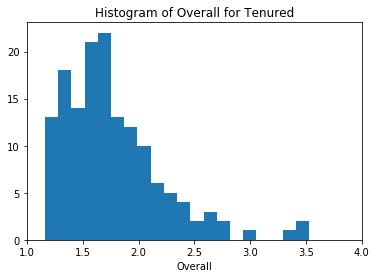

In [52]:
plt.hist(instructors_with_tenure[instructors_with_tenure['tenure']]['overall'], bins=20)
plt.title("Histogram of Overall for Tenured")
plt.xlabel("Overall")
plt.xlim(1, 4)
plt.show()

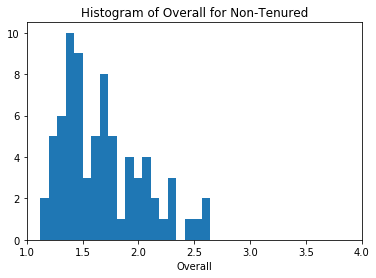

In [53]:
plt.hist(instructors_with_tenure[instructors_with_tenure['tenure'] == False]['overall'], bins=20)
plt.title("Histogram of Overall for Non-Tenured")
plt.xlabel("Overall")
plt.xlim(1, 4)
plt.show()

If you have a high or low overall score, you're more likely to be tenured.